# Carbon Dioxide Emissions Prediction Model (Alternative Implementation)

In [236]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm


## Linear Regression Implementation using the Normal Equation
This class defines a linear regression model that utilizes the normal equation to compute the optimal weights and bias without iterative optimization. It does not require hyperparameters like learning rate or epochs, making it straightforward for simple datasets. The class includes two essential functions:

- `fit(X, Y)`: Takes the feature matrix `X` and the corresponding target values `Y` to train the model. It calculates the optimal weights and bias using the normal equation, ensuring efficient computation.

- `predict(X)`: Accepts a list of features and returns the model's predicted values based on the learned weights and bias.


In [237]:
# Implementing Linear regression using vectorization

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        
        X = np.array(X)
        Y = np.array(Y).reshape(-1, 1)

        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

        self.bias = theta[0, 0]
        self.weights = theta[1:]
    def predict(self, X):
   
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias


# Performance Metrics

In [238]:


def mean_absolute_error(real_values, predicted_values):
    return np.mean(np.abs(real_values - predicted_values))

def root_mean_squared_error(real_values, predicted_values):
    return np.sqrt(np.mean((real_values - predicted_values) ** 2))

def coefficient_of_determination(real_values, predicted_values):
    total_variance = np.sum((real_values - np.mean(real_values)) ** 2)
    explained_variance = np.sum((real_values - predicted_values) ** 2)
    return 1 - (explained_variance / total_variance)


#### Loading and filtering the dataset

In [239]:
# Loading and processing data as in the raw implementation
data = pd.read_csv("./data/CO2_Emissions.csv")

In [240]:
#Selecting necessary columns and renaming columns with space in their names
columns = ['Make', 'Vehicle Class', 'Engine Size(L)', 'Transmission', 'CO2 Emissions(g/km)']
data = data[columns]
data.columns = [col.replace(' ', '_') for col in data.columns]
data.head()

,Make,Vehicle_Class,Engine_Size(L),Transmission,CO2_Emissions(g/km)
0,ACURA,COMPACT,2.0,AS5,196
1,ACURA,COMPACT,2.4,M6,221
2,ACURA,COMPACT,1.5,AV7,136
3,ACURA,SUV - SMALL,3.5,AS6,255
4,ACURA,SUV - SMALL,3.5,AS6,244


In [241]:

# Factorize categorical columns
categorical_columns = ['Make', 'Vehicle_Class', 'Transmission']
for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0] + 1

data.head()

,Make,Vehicle_Class,Engine_Size(L),Transmission,CO2_Emissions(g/km)
0,1,1,2.0,1,196
1,1,1,2.4,2,221
2,1,1,1.5,3,136
3,1,2,3.5,4,255
4,1,2,3.5,4,244


####  Dividing the dataset into  training, testing and validation sets using a 60-20-20 split 

In [242]:

# Split the data
data_x = data.drop(columns=['CO2_Emissions(g/km)']).values
data_y = data['CO2_Emissions(g/km)'].values

train_x, temp_x, train_y, temp_y = train_test_split(data_x, data_y, test_size=0.40, random_state=42)
validation_x, test_x, validation_y, test_y = train_test_split(temp_x, temp_y, test_size=0.50, random_state=42)


### Plotting the relationship between numerical features and target feature

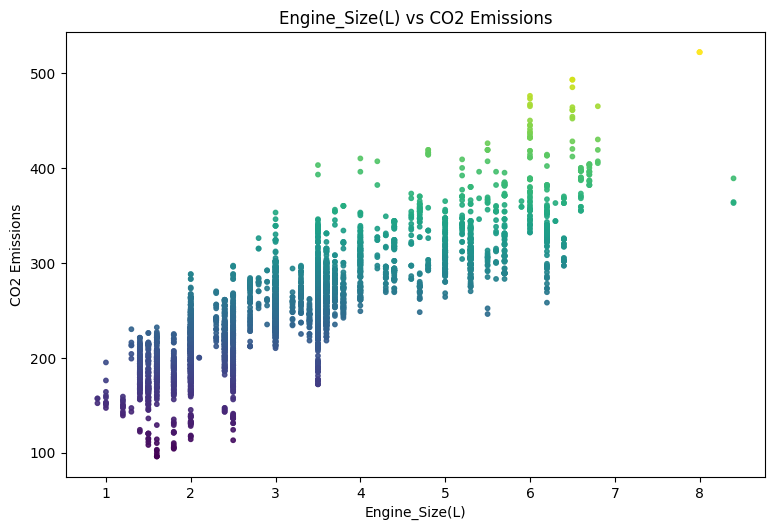

In [243]:
import matplotlib.pyplot as plt

# Plot numerical features
numerical_features = ['Engine_Size(L)']

plt.figure(figsize=(15, 10))  
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)  
    plt.scatter(train_x[:, 2], train_y, s=10, c=train_y, cmap="viridis", alpha=0.9)  # Change to use index for numerical feature
    plt.title(f'{feature} vs CO2 Emissions')
    plt.xlabel(feature)
    plt.ylabel("CO2 Emissions")

plt.tight_layout() 
plt.show()


### Visualizing the relationship between categorical features and Target feature

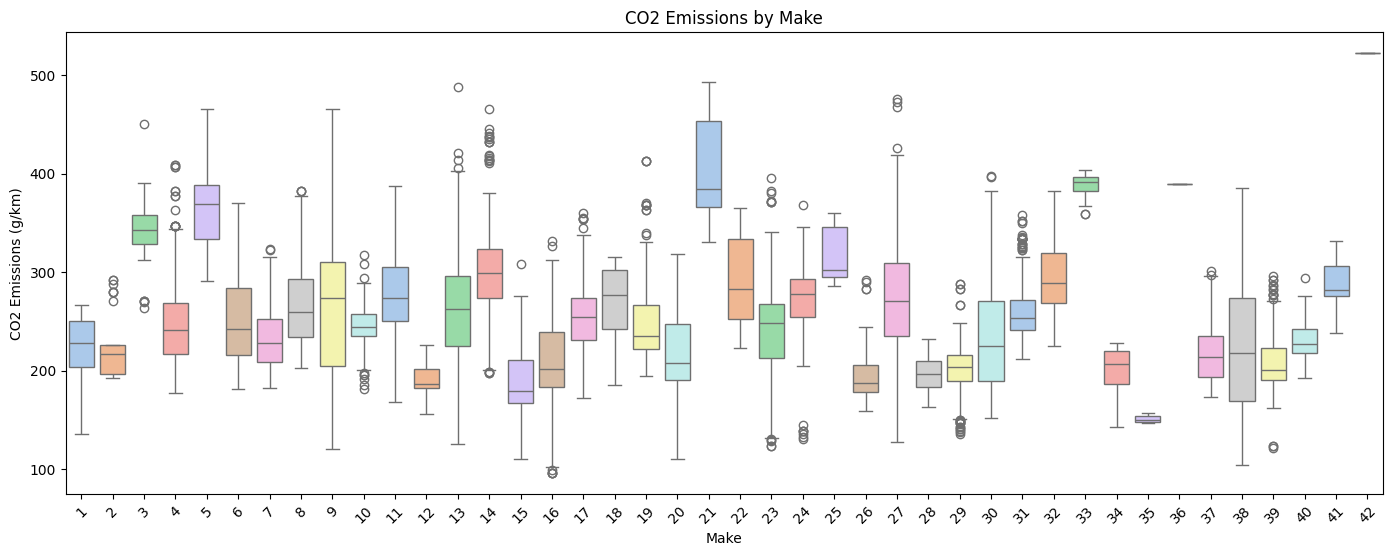

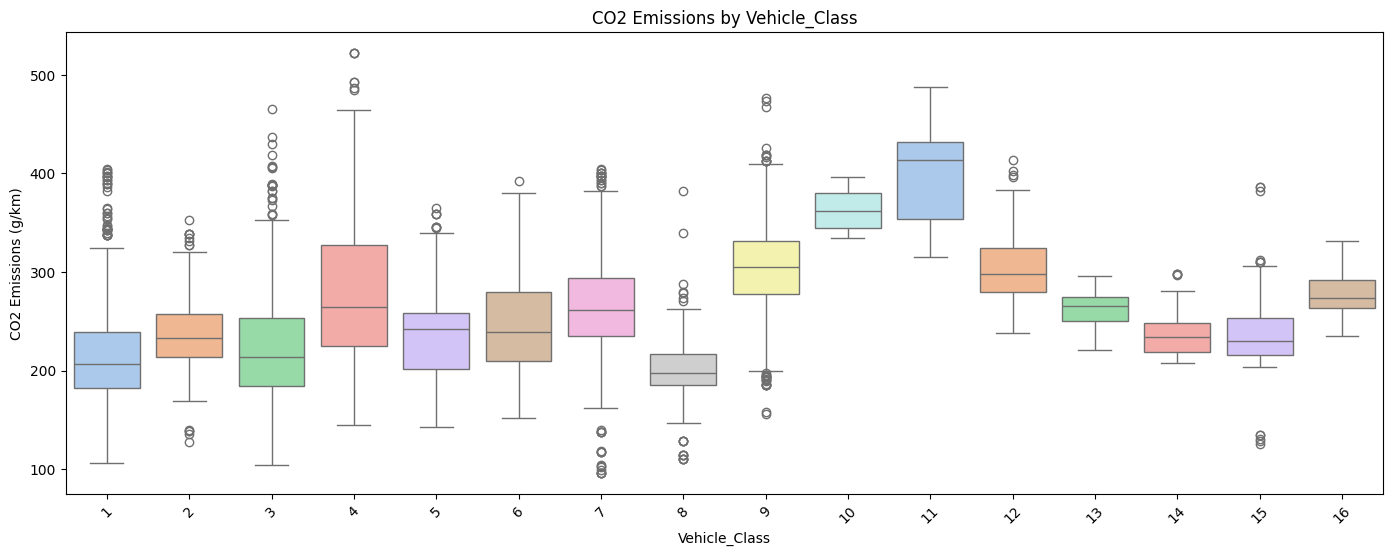

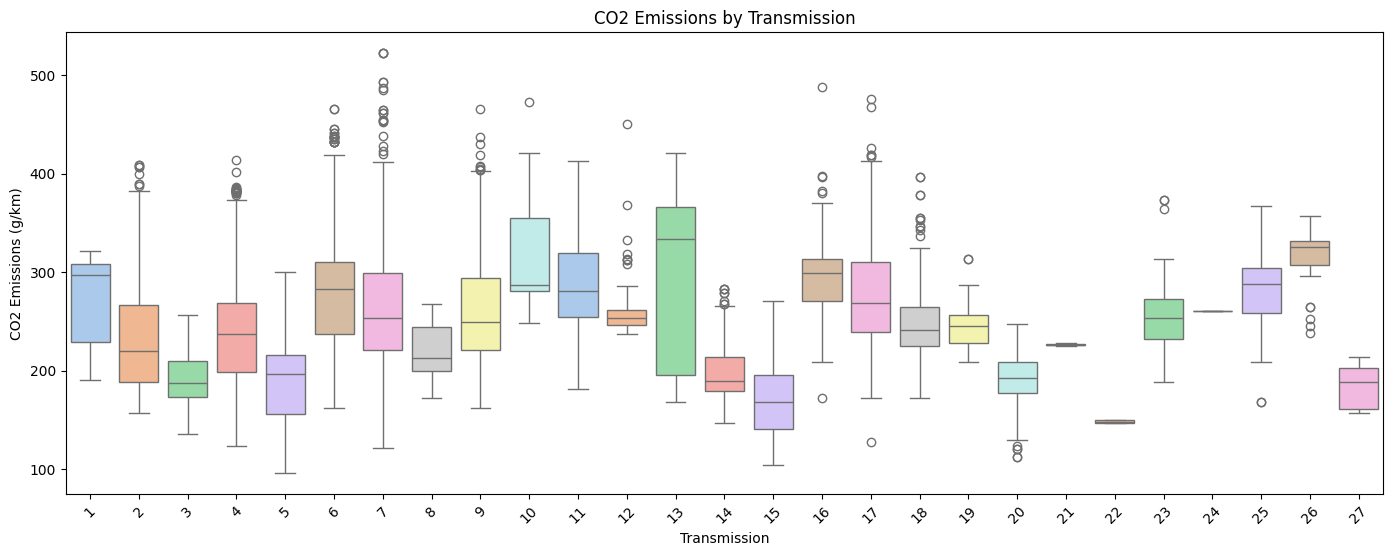

In [244]:
# Plotting categorical features
for i, feature in enumerate(categorical_columns):
    plt.figure(figsize=(17, 6))
    sns.boxplot(x=data[feature], y=data['CO2_Emissions(g/km)'], hue=data[feature], palette="pastel", legend=False)
    plt.title('CO2 Emissions by ' + feature)
    plt.xlabel(feature)
    plt.ylabel('CO2 Emissions (g/km)')
    plt.xticks(rotation=45)
    plt.show()


## Training The model 

In [245]:
# Using the normal equation version of the model
model = LinearRegression()

# Fit model on training data
model.fit(train_x, train_y)

# Validate the model
predictions = model.predict(validation_x)
rms_error = root_mean_squared_error(validation_y, predictions)

print(f"Model RMS Error on Validation Set: {rms_error}")

# Test on the test set to evaluate performance
test_predictions = model.predict(test_x)
test_rms_error = root_mean_squared_error(test_y, test_predictions)
print(f"Model RMS Error on Test Set: {test_rms_error}")




Model RMS Error on Validation Set: 77.8660664528916
Model RMS Error on Test Set: 76.47910813023483


# Testing the Model

The testing data subset will be used along with the following performance metrics to evaluate the final version of the model:


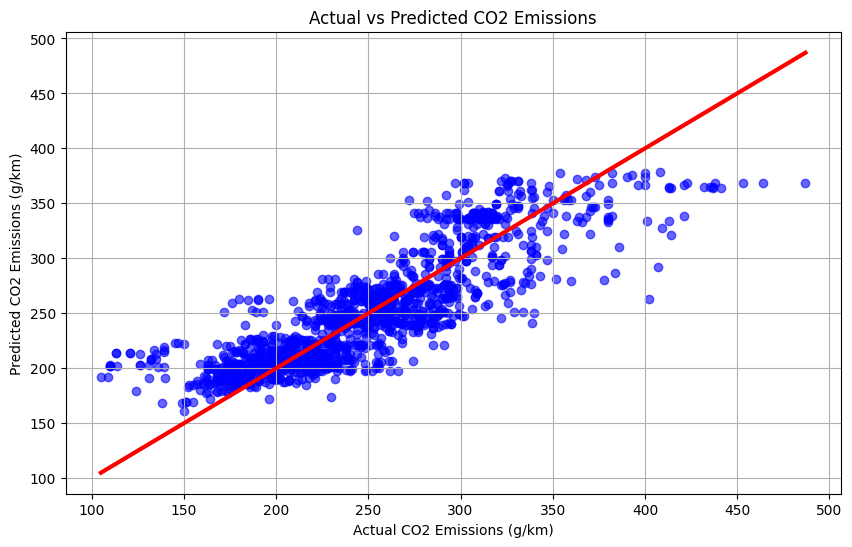

In [246]:
# Predict on test data using the best model (fitted using the normal equation)
predictions = model.predict(test_x)

# Plotting predictions vs. actual values with the new color scheme
plt.figure(figsize=(10, 6))
plt.scatter(test_y, predictions, color='blue', alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], lw=3, color="red")  # Regression line in red
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.title("Actual vs Predicted CO2 Emissions")
plt.grid()
plt.show()




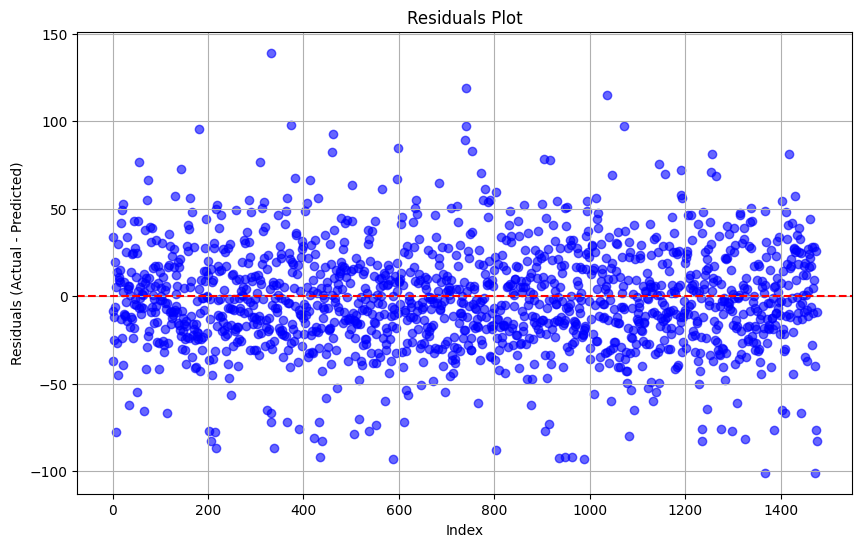

In [247]:
# Residuals plot using predictions and test_y
residuals = test_y.flatten() - predictions.flatten()  # Calculate residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.6)  # Use the index for the x-axis
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.title('Residuals Plot')
plt.xlabel('Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid()
plt.show()

#### Evaluating the model using performance metrics

In [ ]:
# Using the normal equation version of the model
model = LinearRegression()

# Fit model on training data
model.fit(train_x, train_y)

# Validate the model
validation_predictions = model.predict(validation_x)

# Calculate evaluation metrics for validation set
validation_mae = mean_absolute_error(validation_y, validation_predictions)
validation_rmse = root_mean_squared_error(validation_y, validation_predictions)
validation_r2 = coefficient_of_determination(validation_y, validation_predictions)

print(f"Validation Set Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {validation_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {validation_rmse:.2f}")
print(f"Coefficient of Determination (R²): {validation_r2:.2f}")

# Test on the test set to evaluate performance
test_predictions = model.predict(test_x)

# Calculate evaluation metrics for test set
test_mae = mean_absolute_error(test_y, test_predictions)
test_rmse = root_mean_squared_error(test_y, test_predictions)
test_r2 = coefficient_of_determination(test_y, test_predictions)

print(f"\nTest Set Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Coefficient of Determination (R²): {test_r2:.2f}")


Validation Set Evaluation Metrics:
Mean Absolute Error (MAE): 61.85
Root Mean Squared Error (RMSE): 77.87
Coefficient of Determination (R²): -2629.31

Test Set Evaluation Metrics:
Mean Absolute Error (MAE): 60.51
Root Mean Squared Error (RMSE): 76.48
Coefficient of Determination (R²): -2597.14


In [249]:
data = pd.read_excel("./Data/CO2_Emissions_Canada.xlsx")
pd.DataFrame(data=data)
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [250]:
data.shape

(7385, 12)

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

- There are no NaN values in our data set therefore  will just select the columns we want for our model

In [252]:

columns = [
    'Make',  
    'Vehicle Class', 
    'Engine Size(L)', 
    # 'Fuel Consumption City (L/100 km)', 
    # 'Fuel Consumption Hwy (L/100 km)', 
    # 'Fuel Consumption Comb (L/100 km)', 
    'Transmission', 
    'CO2 Emissions(g/km)'
]

filtered_data = data[columns]


In [253]:
filtered_data.head()

,Make,Vehicle Class,Engine Size(L),Transmission,CO2 Emissions(g/km)
0,ACURA,COMPACT,2.0,AS5,196
1,ACURA,COMPACT,2.4,M6,221
2,ACURA,COMPACT,1.5,AV7,136
3,ACURA,SUV - SMALL,3.5,AS6,255
4,ACURA,SUV - SMALL,3.5,AS6,244


In [254]:
# Renaming the columns that Have space in their names
filtered_data.columns = [col.replace(' ', '_') for col in filtered_data.columns]
filtered_data.head()


,Make,Vehicle_Class,Engine_Size(L),Transmission,CO2_Emissions(g/km)
0,ACURA,COMPACT,2.0,AS5,196
1,ACURA,COMPACT,2.4,M6,221
2,ACURA,COMPACT,1.5,AV7,136
3,ACURA,SUV - SMALL,3.5,AS6,255
4,ACURA,SUV - SMALL,3.5,AS6,244


In [255]:
# Lets see how many unique categories we have for the categorical columns
categorical_columns = ['Make', 'Vehicle_Class', 'Transmission']
unique_counts = filtered_data[categorical_columns].nunique()

print(unique_counts)


Make             42
Vehicle_Class    16
Transmission     27
dtype: int64


- Using one hot encoding for the categorical columns

In [256]:

encoded_data = pd.get_dummies(filtered_data, columns=['Make', 'Vehicle_Class', 'Transmission'], drop_first=True)
encoded_data = encoded_data.astype(int)
final_data = pd.DataFrame(encoded_data)
final_data.head()


,Engine_Size(L),CO2_Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,...,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,2,196,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,221,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,244,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [257]:
final_data.info()
final_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 84 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Engine_Size(L)                          7385 non-null   int64
 1   CO2_Emissions(g/km)                     7385 non-null   int64
 2   Make_ALFA ROMEO                         7385 non-null   int64
 3   Make_ASTON MARTIN                       7385 non-null   int64
 4   Make_AUDI                               7385 non-null   int64
 5   Make_BENTLEY                            7385 non-null   int64
 6   Make_BMW                                7385 non-null   int64
 7   Make_BUGATTI                            7385 non-null   int64
 8   Make_BUICK                              7385 non-null   int64
 9   Make_CADILLAC                           7385 non-null   int64
 10  Make_CHEVROLET                          7385 non-null   int64
 11  Make_CHRYSLER    

(7385, 84)

In [258]:

final_data = final_data.sample(frac=1, random_state=42).reset_index(drop=True)

total_samples = final_data.shape[0]
train_size = int(0.6 * total_samples)  # 60% for training
test_size = int(0.2 * total_samples)   # 20% for testing
val_size = total_samples - train_size - test_size  # 20% for validation

#  Split the data
train_data = final_data.iloc[:train_size]  # First 60%
test_data = final_data.iloc[train_size:train_size + test_size]  # Next 20%
val_data = final_data.iloc[train_size + test_size:]  # Last 20%

print(f'Training set size: {train_data.shape}')
print(f'Testing set size: {test_data.shape}')
print(f'Validation set size: {val_data.shape}')

Training set size: (4431, 84)
Testing set size: (1477, 84)
Validation set size: (1477, 84)


In [259]:
duplicates = train_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
train_data = train_data.drop_duplicates()




Number of duplicate rows: 1210


# Training the model using vectorization

In [260]:



#First Prepare the data for training
X_train =test_data.drop(columns=['CO2_Emissions(g/km)']).values  # Features
y_train =test_data['CO2_Emissions(g/km)'].values  # Target variable

# Then we add a column of ones to X to account for the intercept term i.e. bias term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]  

# We calculate weights using the normal equation for efficiency
X_transpose = X_train.T
weights = np.linalg.inv(X_transpose @ X_train) @ X_transpose @ y_train

# Finally we display the calculated weights
print("Weights:", weights)


LinAlgError: Singular matrix

# Testing the model

In [ ]:
X_test = test_data.drop(columns=['CO2_Emissions(g/km)']).values  
y_test = test_data['CO2_Emissions(g/km)'].values  

X_test = np.c_[np.ones(X_test.shape[0]), X_test]  

y_pred = X_test @ weights  


- Comparing predicted emissions versus true values

In [ ]:

predicted_df = pd.DataFrame({'Predicted_CO2_Emissions': y_pred})

results_df = pd.concat([test_data.reset_index(drop=True), predicted_df], axis=1)


print(results_df[['CO2_Emissions(g/km)', 'Predicted_CO2_Emissions']].head(10))  


In [ ]:

results_df['Residuals'] = results_df['CO2_Emissions(g/km)'] - results_df['Predicted_CO2_Emissions']

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['Residuals'], color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.title('Residuals Plot')
plt.xlabel('Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid()
plt.show()


In [ ]:



results_df['Absolute_Error'] = abs(results_df['CO2_Emissions(g/km)'] - results_df['Predicted_CO2_Emissions'])

mae = results_df['Absolute_Error'].mean()

print(f'Mean Absolute Error (MAE): {mae}')


In [ ]:
import pandas as pd

mean_actual = results_df['CO2_Emissions(g/km)'].mean()


SS_tot = ((results_df['CO2_Emissions(g/km)'] - mean_actual) ** 2).sum()


results_df['Residuals'] = results_df['CO2_Emissions(g/km)'] - results_df['Predicted_CO2_Emissions']


SS_res = (results_df['Residuals'] ** 2).sum()

R_squared = 1 - (SS_res / SS_tot)

print(f'Coefficient of Determination (R^2): {R_squared}')
